Saving Acoustic index of four recording devices.csv to Acoustic index of four recording devices (2).csv
   Number Microphone          ACI       ADI       AEI        BI         H  \
0       1         AM  1831.806930  1.928350  0.465839  5.746620  0.804080   
1       2         AM  1829.962004  1.838273  0.514723  5.453269  0.785654   
2       3         AM  1830.605290  1.745573  0.561216  5.597627  0.764782   
3       4         AM  1827.268711  1.708140  0.572489  6.963044  0.714763   
4       5         AM  1823.975054  1.582366  0.626809  5.708716  0.715912   

       NDSI  
0  0.700848  
1  0.650409  
2  0.712573  
3  0.700434  
4  0.514006  
Coefficients: [ 7.30842126e+01  7.35281206e-02  1.36587621e+00  1.20700754e+02
 -1.74121952e+01]
Intercept: 1632.6510096943678
R^2 (score): 0.34714156221330406


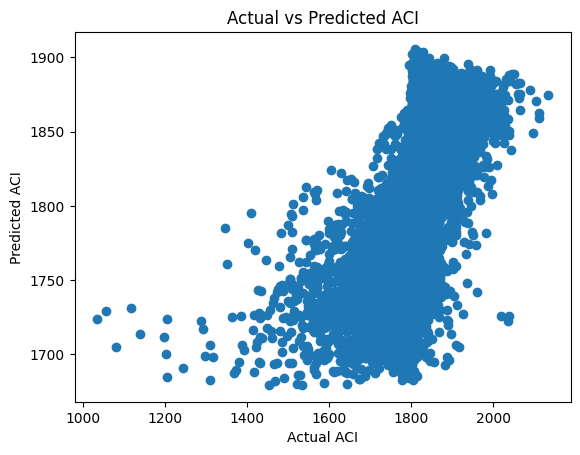

        Actual    Predicted
0  1831.806930  1866.316185
1  1829.962004  1857.990038
2  1830.605290  1847.814139
3  1827.268711  1841.118103
4  1823.975054  1833.601636


In [ ]:
# 1. Install required packages (skip if already installed

# 2. Upload the CSV file
from google.colab import files
uploaded = files.upload()

# 3. Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 4. Load data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print(df.head())  # Show first few rows & column names

# 5. Select features (X) and target (y)
# Example: Predict 'ACI' using other indices. Remove 'Number' and 'Microphone' as they are not numeric indices.
X = df[['ADI', 'AEI', 'BI', 'H', 'NDSI']]
y = df['ACI']

# 6. Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# 7. Print results
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("R^2 (score):", reg.score(X, y))

# 8. Predict and plot results
y_pred = reg.predict(X)
plt.scatter(y, y_pred)
plt.xlabel("Actual ACI")
plt.ylabel("Predicted ACI")
plt.title("Actual vs Predicted ACI")
plt.show()

# 9. Compare actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(results.head())


   Number Microphone          ACI       ADI       AEI        BI         H  \
0       1         AM  1831.806930  1.928350  0.465839  5.746620  0.804080   
1       2         AM  1829.962004  1.838273  0.514723  5.453269  0.785654   
2       3         AM  1830.605290  1.745573  0.561216  5.597627  0.764782   
3       4         AM  1827.268711  1.708140  0.572489  6.963044  0.714763   
4       5         AM  1823.975054  1.582366  0.626809  5.708716  0.715912   

       NDSI  
0  0.700848  
1  0.650409  
2  0.712573  
3  0.700434  
4  0.514006  
Accuracy: 0.9086538461538461
Confusion Matrix:
 [[854  89]
 [ 25 280]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       943
           1       0.76      0.92      0.83       305

    accuracy                           0.91      1248
   macro avg       0.87      0.91      0.88      1248
weighted avg       0.92      0.91      0.91      1248



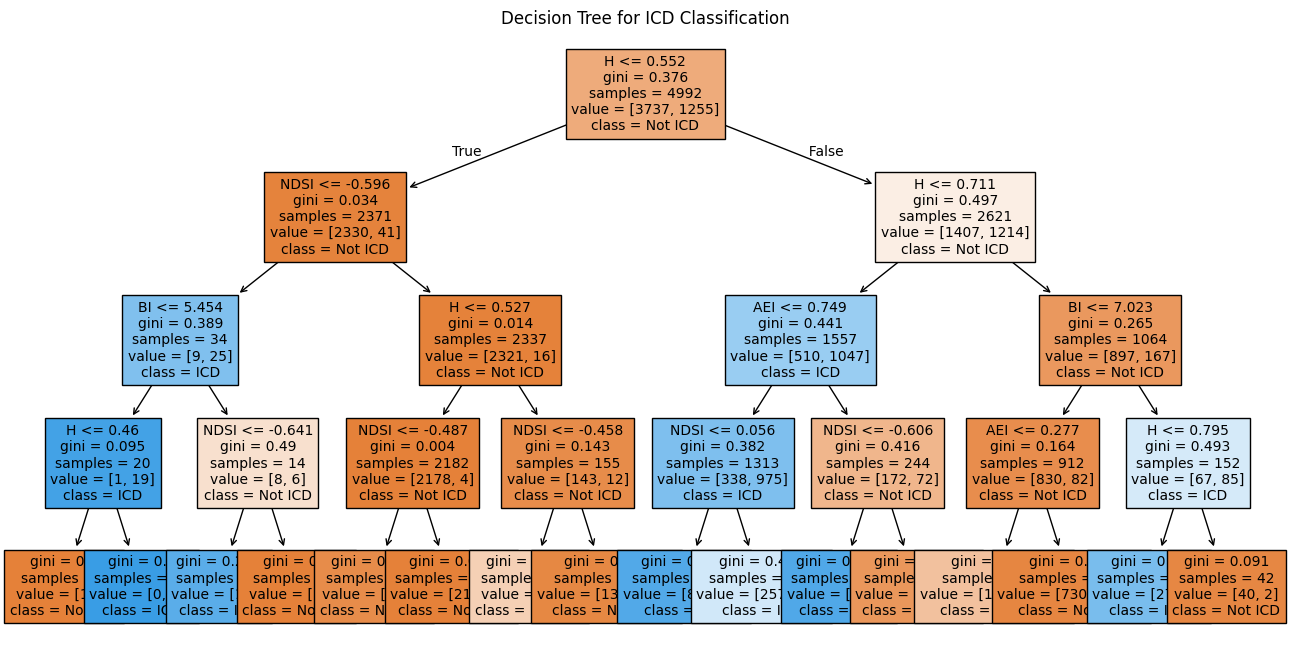

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Acoustic index of four recording devices.csv")
print(df.head())

# Create binary target: is_ICD
df['is_ICD'] = (df['Microphone'] == 'ICD').astype(int)

# Select features
X = df[['ADI', 'AEI', 'BI', 'H', 'NDSI']]
y = df['is_ICD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Decision Tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not ICD', 'ICD'], filled=True, fontsize=10)
plt.title("Decision Tree for ICD Classification")
plt.show()


   Number Microphone          ACI       ADI       AEI        BI         H  \
0       1         AM  1831.806930  1.928350  0.465839  5.746620  0.804080   
1       2         AM  1829.962004  1.838273  0.514723  5.453269  0.785654   
2       3         AM  1830.605290  1.745573  0.561216  5.597627  0.764782   
3       4         AM  1827.268711  1.708140  0.572489  6.963044  0.714763   
4       5         AM  1823.975054  1.582366  0.626809  5.708716  0.715912   

       NDSI  
0  0.700848  
1  0.650409  
2  0.712573  
3  0.700434  
4  0.514006  
Accuracy: 0.842948717948718
Confusion Matrix:
 [[870  73]
 [123 182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       943
           1       0.71      0.60      0.65       305

    accuracy                           0.84      1248
   macro avg       0.79      0.76      0.77      1248
weighted avg       0.84      0.84      0.84      1248



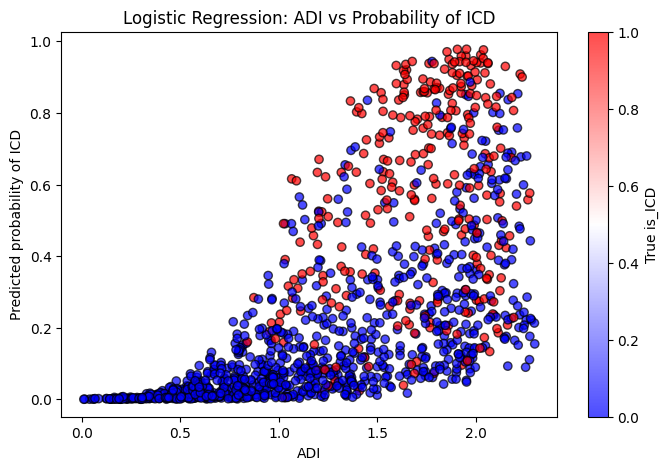

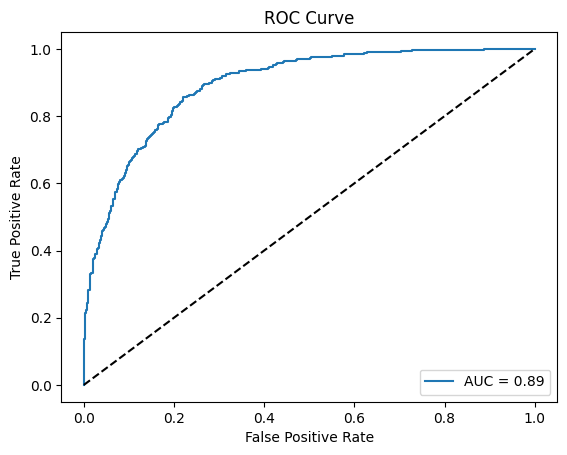

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("Acoustic index of four recording devices.csv")
print(df.head())

# 2. Create binary target: 1 if Microphone=='ICD', else 0
df['is_ICD'] = (df['Microphone'] == 'ICD').astype(int)

# 3. Select features and target
X = df[['ADI', 'AEI', 'BI', 'H', 'NDSI']]
y = df['is_ICD']

# 4. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit logistic regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Plot probability for ADI
plt.figure(figsize=(8, 5))
plt.scatter(X_test['ADI'], y_proba, c=y_test, cmap='bwr', edgecolor='k', alpha=0.7)
plt.xlabel('ADI')
plt.ylabel('Predicted probability of ICD')
plt.title('Logistic Regression: ADI vs Probability of ICD')
plt.colorbar(label='True is_ICD')
plt.show()

# 8. Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
